In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
X_train = dataset.drop(['PassengerId','Ticket','Survived'], axis=1)
X_test = test_set.drop(['PassengerId','Ticket'], axis=1)

In [7]:
X_train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
y_train = dataset['Survived']

In [9]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


<Figure size 432x288 with 0 Axes>

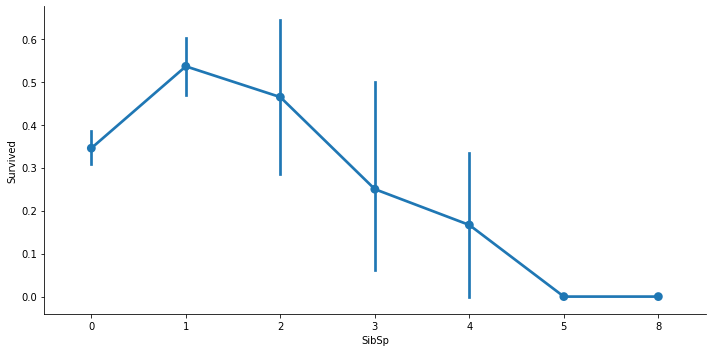

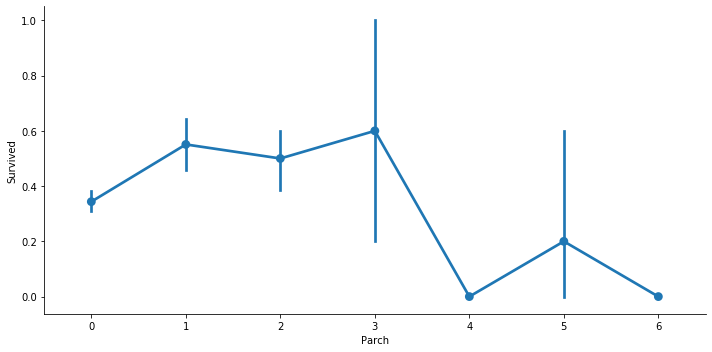

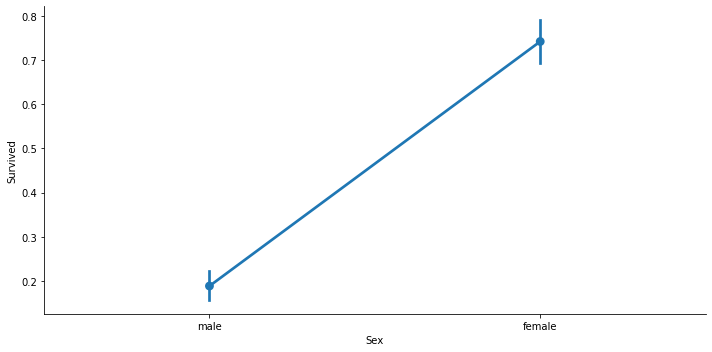

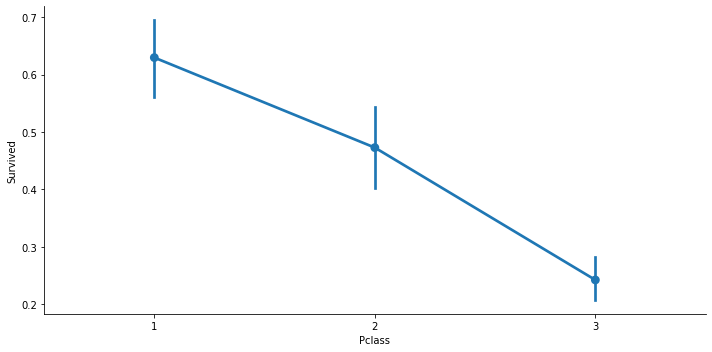

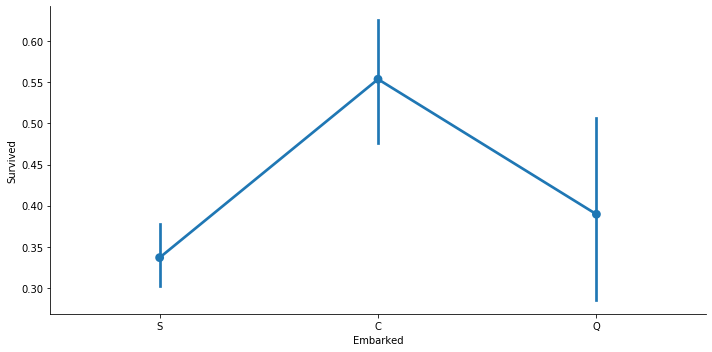

In [10]:
import seaborn as sns
for i,col in enumerate(['SibSp','Parch','Sex', 'Pclass','Embarked']):
    plt.figure(i)
    sns.catplot(x=col,y='Survived',data=dataset, kind='point',aspect=2)

In [11]:
X_train['Family'] = X_train['SibSp']+X_train['Parch']
X_train['Cabin_ind'] = np.where(X_train['Cabin'].isnull(), 0, 1)
X_test['Family'] = X_test['SibSp']+X_test['Parch']
X_test['Cabin_ind'] = np.where(X_test['Cabin'].isnull(), 0, 1)
X_train.drop(['Embarked','SibSp', 'Parch', 'Cabin'], axis = 1, inplace = True)
X_test.drop(['Embarked','SibSp', 'Parch', 'Cabin'], axis = 1, inplace = True)

In [12]:
X_train['Title'] = X_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Changing to common category
X_train['Title'] = X_train['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
X_train['Title'] = X_train['Title'].replace('Ms', 'Miss')
X_train['Title'] = X_train['Title'].replace('Mme', 'Mrs')
X_train['Title'] = X_train['Title'].replace('Mlle', 'Miss')

means = X_train.groupby('Title')['Age'].mean()

title_list = ['Master','Miss','Mr','Mrs','Others']
def age_missing_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title 
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) 
        
age_missing_replace(means, X_train, title_list)

In [13]:
X_test['Title'] = X_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Changing to common category
X_test['Title'] = X_test['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
X_test['Title'] = X_test['Title'].replace('Ms', 'Miss')
X_test['Title'] = X_test['Title'].replace('Mme', 'Mrs')
X_test['Title'] = X_test['Title'].replace('Mlle', 'Miss')

means = X_test.groupby('Title')['Age'].mean()

title_list = ['Master','Miss','Mr','Mrs','Others']
def age_missing_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title 
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title])
        
age_missing_replace(means, X_test, title_list)

In [14]:
X_train.drop(['Name','Title'], axis = 1, inplace=True)
X_test.drop(['Name','Title'], axis=1, inplace=True)

In [15]:
X_train

,Pclass,Sex,Age,Fare,Family,Cabin_ind
0,3,male,22.000000,7.2500,1,0
1,1,female,38.000000,71.2833,1,1
2,3,female,26.000000,7.9250,0,0
3,1,female,35.000000,53.1000,1,1
4,3,male,35.000000,8.0500,0,0
...,...,...,...,...,...,...
886,2,male,27.000000,13.0000,0,0
887,1,female,19.000000,30.0000,0,1
888,3,female,21.845638,23.4500,3,0
889,1,male,26.000000,30.0000,0,1


In [16]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
X_train.drop(['Fare'],axis=1, inplace=True)
X_test.drop(['Fare'],axis=1, inplace=True)

In [18]:
X_train = X_train.values
X_test = X_test.values
X_train

array([[3, 'male', 22.0, 1, 0],
       [1, 'female', 38.0, 1, 1],
       [3, 'female', 26.0, 0, 0],
       ...,
       [3, 'female', 21.845637583892618, 3, 0],
       [1, 'male', 26.0, 0, 1],
       [3, 'male', 32.0, 0, 0]], dtype=object)

In [1]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X_test[:, 0] = labelencoder_X.fit_transform(X_test[:, 0 ])
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X_test = ct.fit_transform(X_test)
X_test = X_test[:,1:8]

NameError: name 'X_test' is not defined

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X_train[:, 0] = labelencoder_X.fit_transform(X_train[:, 0])
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X_train = ct.fit_transform(X_train)
X_train = X_train[:,1:8]

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[:,1] = le.fit_transform(X_train[:,1])
X_test[:,1] = le.transform(X_test[:,1])

In [22]:
X_train

array([[1.0, 2, 22.0, 1, 0],
       [0.0, 0, 38.0, 1, 1],
       [0.0, 2, 26.0, 0, 0],
       ...,
       [0.0, 2, 21.845637583892618, 3, 0],
       [1.0, 0, 26.0, 0, 1],
       [1.0, 2, 32.0, 0, 0]], dtype=object)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:] = np.nan_to_num(X_train)
X_test[:] = np.nan_to_num(X_test)

In [24]:
X_train

array([[ 0.73769513,  0.82737724, -0.58468169,  0.05915988, -0.54492498],
       [-1.35557354, -1.56610693,  0.62093289,  0.05915988,  1.835115  ],
       [-1.35557354,  0.82737724, -0.28327805, -0.56097483, -0.54492498],
       ...,
       [-1.35557354,  0.82737724, -0.59631304,  1.29942929, -0.54492498],
       [ 0.73769513, -1.56610693, -0.28327805, -0.56097483,  1.835115  ],
       [ 0.73769513,  0.82737724,  0.16882742, -0.56097483, -0.54492498]])

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state = 0, criterion = 'entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_pred = classifier.predict(X_test)
id = test_set.iloc[:, 0].values
res = np.concatenate((id.reshape(len(id),1), y_pred.reshape(len(y_pred),1)),1)
np.savetxt('result3.csv', res, fmt='%s', delimiter=',', header="PassengerId, y")

In [32]:
pd.read_csv('result3.csv')

,# PassengerId,y
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [28]:
X_test

array([[ 0.73769513,  0.82737724,  0.3572047 , -0.56097483, -0.54492498],
       [-1.35557354,  0.82737724,  1.2990911 ,  0.05915988, -0.54492498],
       [ 0.73769513, -0.36936484,  2.42935478, -0.56097483, -0.54492498],
       ...,
       [ 0.73769513,  0.82737724,  0.65860835, -0.56097483, -0.54492498],
       [ 0.73769513,  0.82737724,  0.16882742, -0.56097483, -0.54492498],
       [ 0.73769513,  0.82737724, -1.68431744,  0.67929458, -0.54492498]])